In [5]:
from typing import List, Dict

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [6]:
filesuffixes = [
    # '_for_experiment_not_screened_cols_top_50_features_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    ]

In [7]:
cv_analytics_utils: Dict[str, CvAnalyticsUtil] = {}

In [8]:
for filesuffix in filesuffixes:
    cv_analytics_util = CvAnalyticsUtil.load_cv_analytics_utils(filesuffix)
    print(filesuffix)
    cv_analytics_utils[filesuffix] = cv_analytics_util

_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials
_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials


_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.02


Cross-Validation measures:
+--------------------+-----------+-------------+------------+-----------+
|                    |      mean |         std |        min |       max |
|--------------------+-----------+-------------+------------+-----------|
| precision__class_0 | 0.999858  | 0.000109786 | 0.999629   | 1         |
| recall__class_0    | 0.955793  | 0.00362007  | 0.948021   | 0.964701  |
| f1-score__class_0  | 0.977326  | 0.00188872  | 0.973228   | 0.981989  |
| precision__class_1 | 0.0139275 | 0.00284816  | 0.00990099 | 0.0197044 |
| recall__class_1    | 0.82037   | 0.14149     | 0.555556   | 1         |
| f1-score__class_1  | 0.027384  | 0.00556585  | 0.0194553  | 0.0385542 |
| accuracy           | 0.95569   | 0.0036121   | 0.94788    | 0.96464   |
| auc                | 0.928581  | 0.066725    | 0.75856    | 0.997993  |
+--------------------+---------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


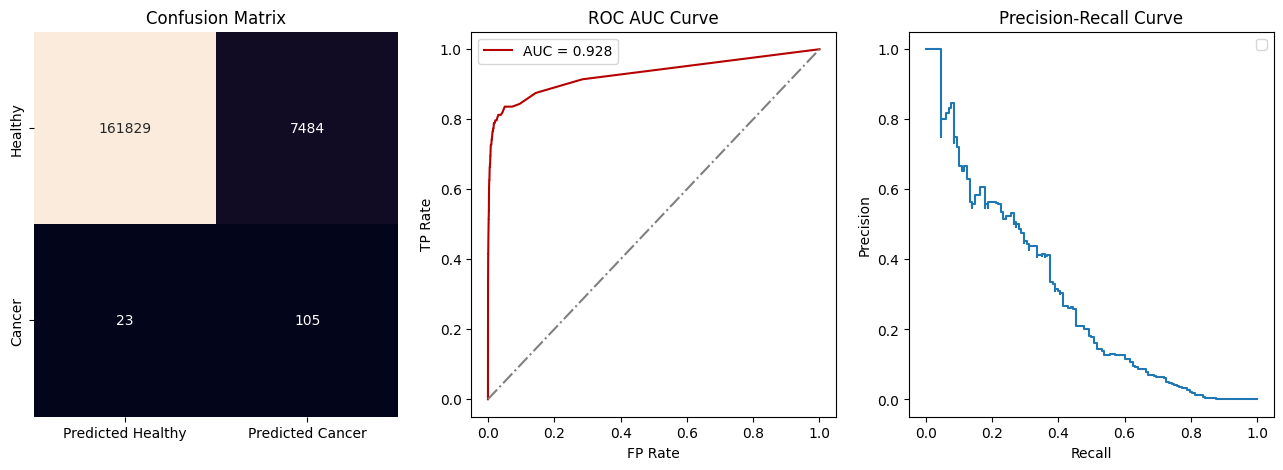

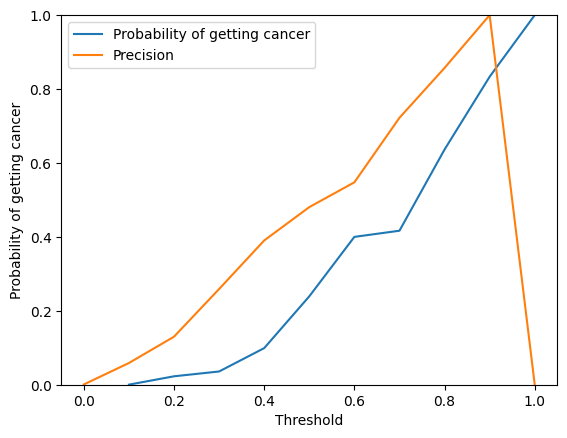

_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.023333333333333334


Cross-Validation measures:
+--------------------+------------+-------------+------------+-----------+
|                    |       mean |         std |        min |       max |
|--------------------+------------+-------------+------------+-----------|
| precision__class_0 | 0.999002   | 0.000349313 | 0.998414   | 0.999568  |
| recall__class_0    | 0.349148   | 0.0100728   | 0.331982   | 0.364383  |
| f1-score__class_0  | 0.517372   | 0.0110716   | 0.498408   | 0.534075  |
| precision__class_1 | 0.00144197 | 0.000186088 | 0.0011518  | 0.0017798 |
| recall__class_1    | 0.729187   | 0.0962239   | 0.585366   | 0.878049  |
| f1-score__class_1  | 0.00287824 | 0.000371451 | 0.00229907 | 0.0035524 |
| accuracy           | 0.349638   | 0.0100277   | 0.332653   | 0.365045  |
| auc                | 0.560234   | 0.0621285   | 0.42428    | 0.675819  |
+---------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


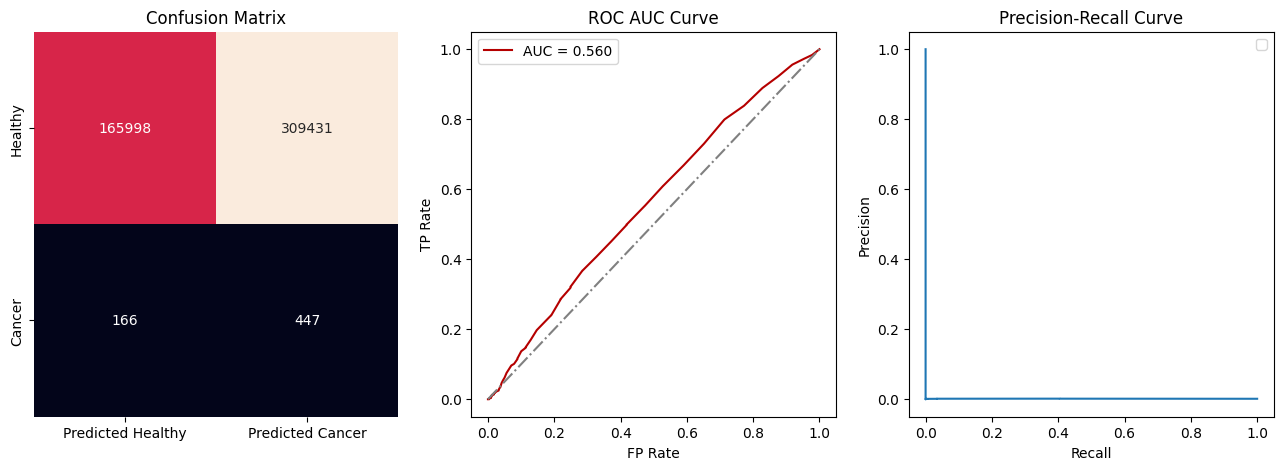

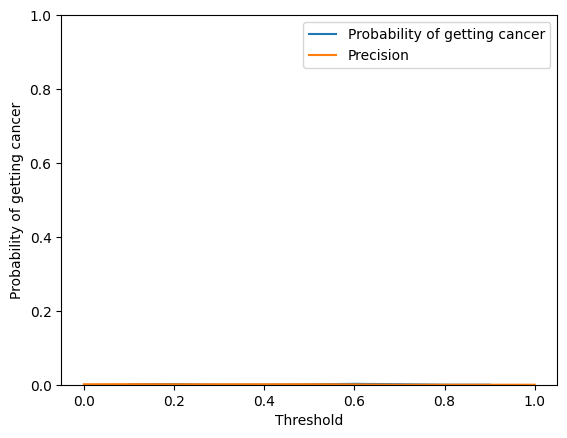

_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.02


Cross-Validation measures:
+--------------------+-----------+-------------+-----------+-----------+
|                    |      mean |         std |       min |       max |
|--------------------+-----------+-------------+-----------+-----------|
| precision__class_0 | 0.999847  | 9.62322e-05 | 0.999721  | 1         |
| recall__class_0    | 0.961976  | 0.00278612  | 0.957115  | 0.966336  |
| f1-score__class_0  | 0.980544  | 0.0014343   | 0.977954  | 0.982747  |
| precision__class_1 | 0.0157965 | 0.00277316  | 0.0102881 | 0.019802  |
| recall__class_1    | 0.803704  | 0.128357    | 0.625     | 1         |
| f1-score__class_1  | 0.0309776 | 0.0054092   | 0.0202429 | 0.0387409 |
| accuracy           | 0.961858  | 0.00275753  | 0.956878  | 0.966097  |
| auc                | 0.923047  | 0.0580733   | 0.828073  | 0.997988  |
+--------------------+----

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


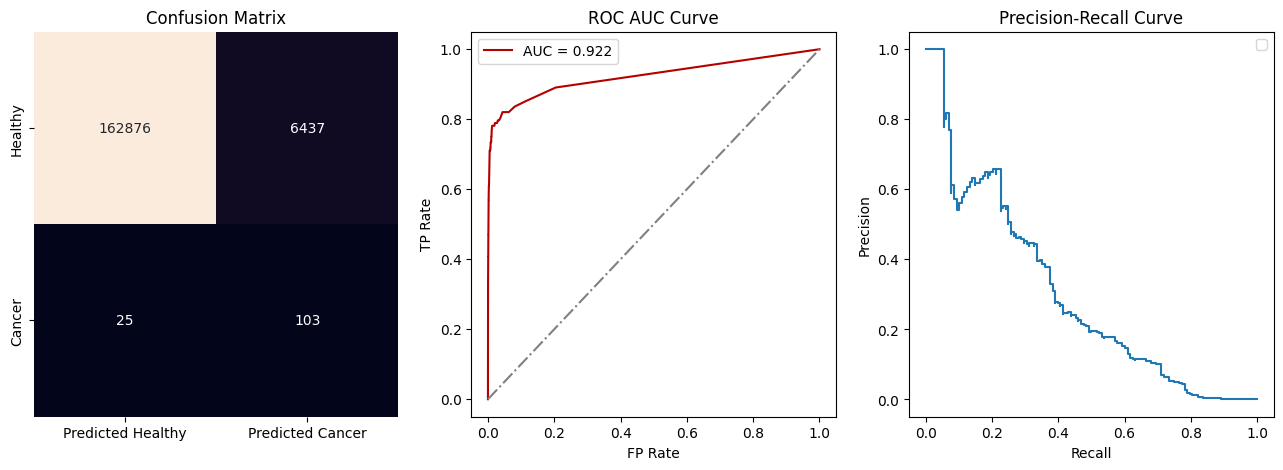

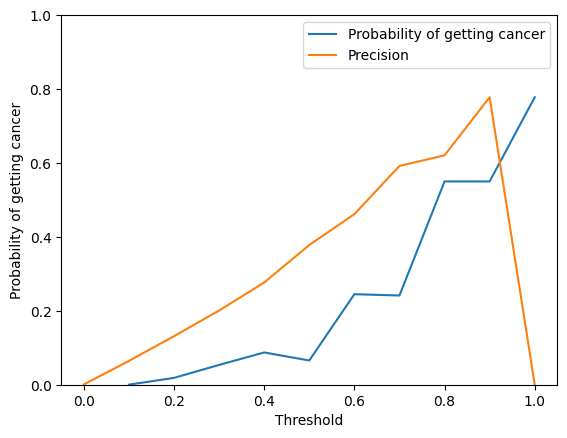

_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.005972760729491711


Cross-Validation measures:
+--------------------+------------+-------------+------------+-----------+
|                    |       mean |         std |        min |       max |
|--------------------+------------+-------------+------------+-----------|
| precision__class_0 | 0.999797   | 0.000137565 | 0.999425   | 1         |
| recall__class_0    | 0.927134   | 0.0169652   | 0.901412   | 0.954413  |
| f1-score__class_0  | 0.96202    | 0.00910016  | 0.948106   | 0.976543  |
| precision__class_1 | 0.00795215 | 0.00187614  | 0.00352941 | 0.0114723 |
| recall__class_1    | 0.751852   | 0.165744    | 0.333333   | 1         |
| f1-score__class_1  | 0.0157275  | 0.00368189  | 0.00698487 | 0.0225564 |
| accuracy           | 0.927      | 0.0168899   | 0.901393   | 0.954185  |
| auc                | 0.914746   | 0.0587536   | 0.758282   | 0.997061  |
+------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


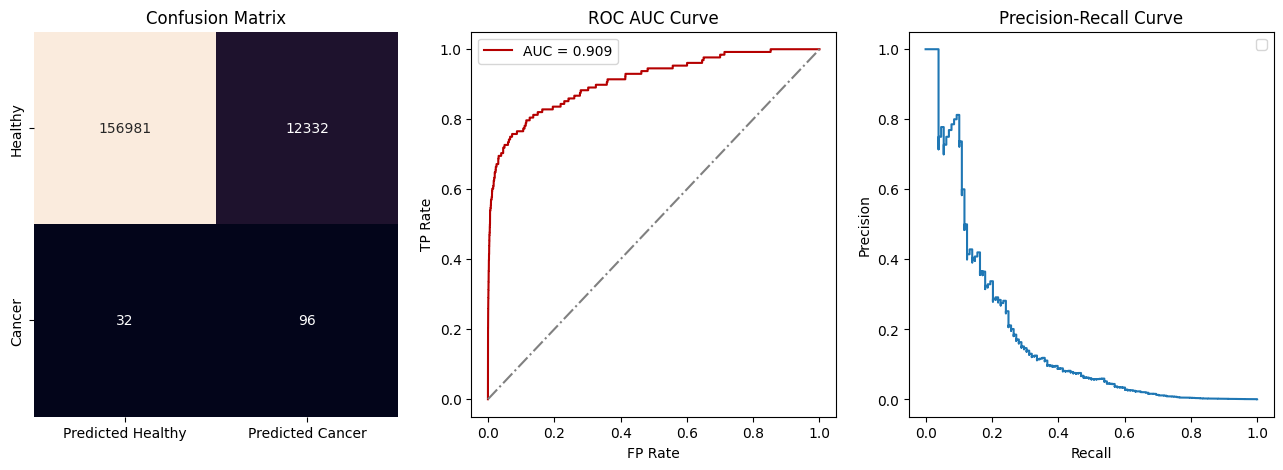

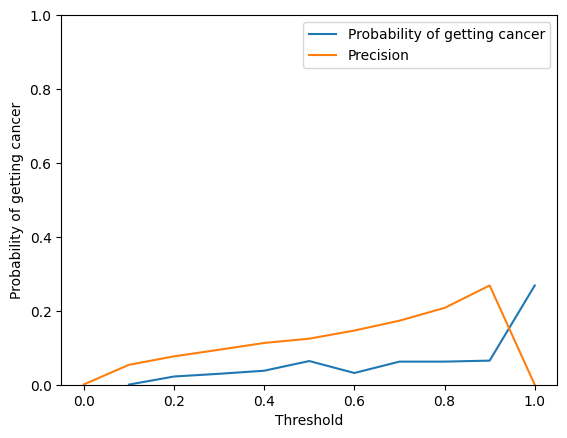

_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.259085088968277


Cross-Validation measures:
+--------------------+------------+-------------+------------+------------+
|                    |       mean |         std |        min |        max |
|--------------------+------------+-------------+------------+------------|
| precision__class_0 | 0.998947   | 0.000276894 | 0.9985     | 0.999369   |
| recall__class_0    | 0.511314   | 0.0210062   | 0.481985   | 0.54749    |
| f1-score__class_0  | 0.676168   | 0.018254    | 0.650249   | 0.707298   |
| precision__class_1 | 0.00151842 | 0.000278414 | 0.00107476 | 0.00194126 |
| recall__class_1    | 0.578902   | 0.121833    | 0.390244   | 0.756098   |
| f1-score__class_1  | 0.00302889 | 0.000555574 | 0.00214362 | 0.00387258 |
| accuracy           | 0.511402   | 0.020864    | 0.482182   | 0.547431   |
| auc                | 0.562912   | 0.0685144   | 0.447926   | 0.646056   |
+----------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


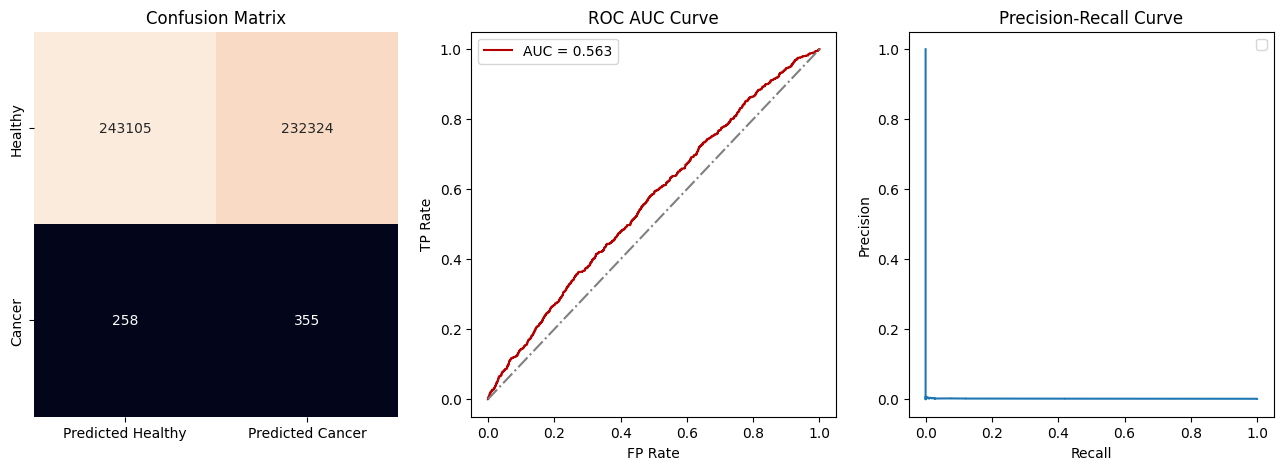

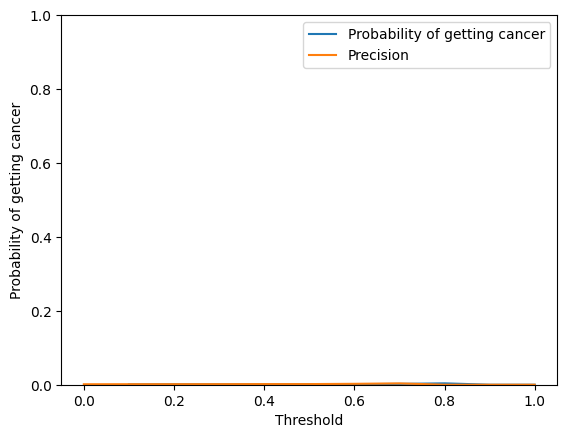

_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.0033058500848710537


Cross-Validation measures:
+--------------------+-----------+-------------+------------+------------+
|                    |      mean |         std |        min |        max |
|--------------------+-----------+-------------+------------+------------|
| precision__class_0 | 0.999844  | 0.000159698 | 0.999411   | 1          |
| recall__class_0    | 0.900819  | 0.0174097   | 0.879315   | 0.943303   |
| f1-score__class_0  | 0.94767   | 0.00952249  | 0.935782   | 0.970692   |
| precision__class_1 | 0.0062677 | 0.00147923  | 0.00273473 | 0.00924499 |
| recall__class_1    | 0.815741  | 0.184814    | 0.333333   | 1          |
| f1-score__class_1  | 0.0124345 | 0.00291681  | 0.00542495 | 0.0182371  |
| accuracy           | 0.900753  | 0.0173271   | 0.879401   | 0.943084   |
| auc                | 0.918183  | 0.0865031   | 0.643721   | 0.993966 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


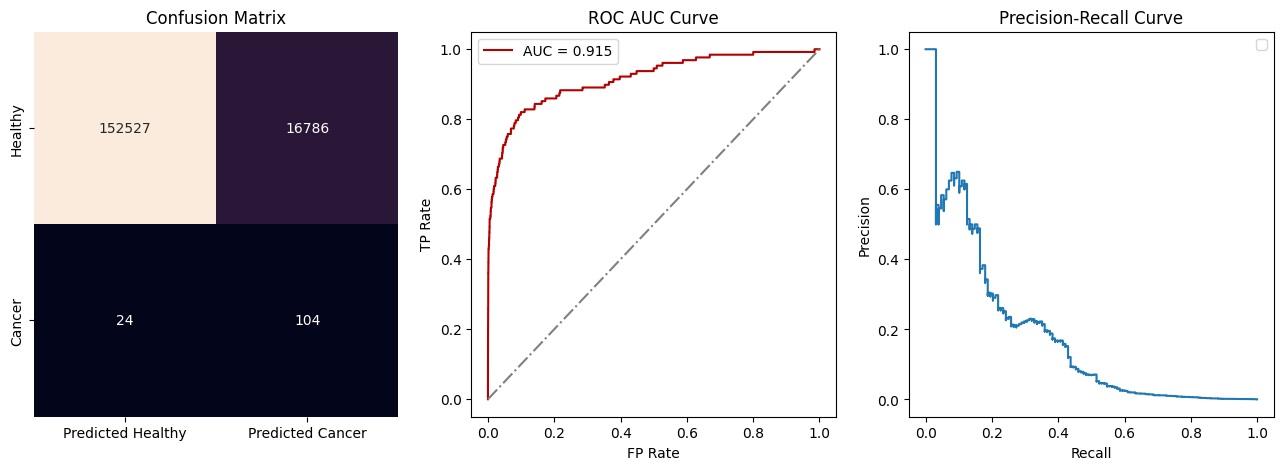

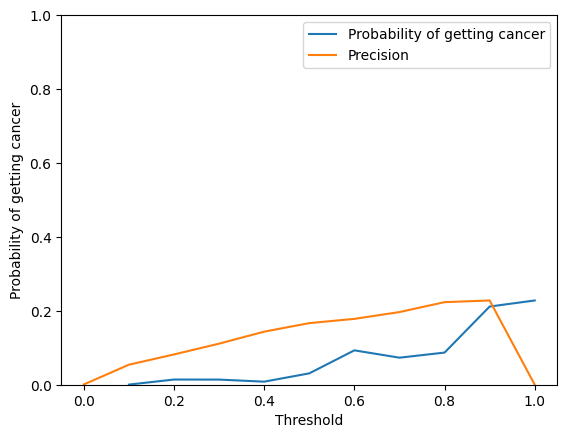

In [9]:
for filesuffix, cv_analytics_util in cv_analytics_utils.items():
    print(filesuffix)
    threshold = cv_analytics_util.get_optimal_operating_point()
    print(f"Threshold: {threshold}")
    cv_analytics_util.update_thresholds(threshold)
    cv_analytics_util.get_cv_report();
    cv_analytics_util.display_graph()
    label = cv_analytics_util.get_label()
    full_dataset = cv_analytics_util.get_dataset_with_predictions()
    per_thereshold_metrics = get_per_thereshold_metrics(full_dataset, f'{label}_prob', label, thresholds = np.linspace(0, 1, 11))
    per_thereshold_metrics['bucket_positives'] = per_thereshold_metrics['True_Positive'].diff().abs()
    per_thereshold_metrics['bucket_negatives'] = per_thereshold_metrics['False_Positive'].diff().abs()
    per_thereshold_metrics['per_bucket_probability'] = per_thereshold_metrics['bucket_positives'] / (per_thereshold_metrics['bucket_positives'] + per_thereshold_metrics['bucket_negatives'])
    title = ""
    x = per_thereshold_metrics['Threshold']
    y = per_thereshold_metrics['per_bucket_probability']
    plt.plot(x, y, label="Probability of getting cancer")
    y = per_thereshold_metrics['Precision']
    plt.plot(x, y, label="Precision")
    plt.ylabel("Probability of getting cancer")
    plt.xlabel("Threshold")
    plt.title(title)
    plt.ylim([0, 1])
    plt.legend()
    plt.show()


In [10]:
single_cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

FileNotFoundError: [Errno 2] No such file or directory: './stored_classes/cv_analytics_util/experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials.sav'



Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.999538  | 0.000231329 | 0.999016 | 0.999823 |
| recall__class_0    | 0.996637  | 0.000857611 | 0.995399 | 0.998152 |
| f1-score__class_0  | 0.998085  | 0.000428087 | 0.997233 | 0.998767 |
| precision__class_1 | 0.0835833 | 0.0602229   | 0        | 0.176471 |
| recall__class_1    | 0.38277   | 0.241106    | 0        | 0.777778 |
| f1-score__class_1  | 0.133621  | 0.0912577   | 0        | 0.285714 |
| accuracy           | 0.996179  | 0.00085284  | 0.994482 | 0.997538 |
| auc                | 0.825113  | 0.109238    | 0.649522 | 0.982172 |
+--------------------+-----------+-------------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


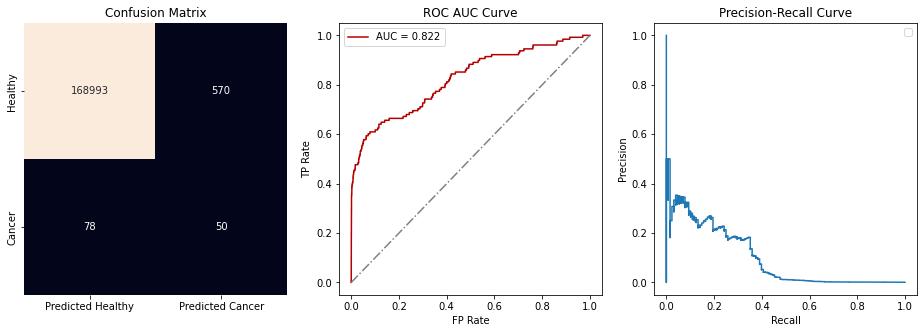

In [ ]:
cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [ ]:
single_cv_analytics_util.merge_in_dataset(get_screened_first_5_no_process_dataset(label = f'cancer_in_next_1_years'))

Added new records: 249


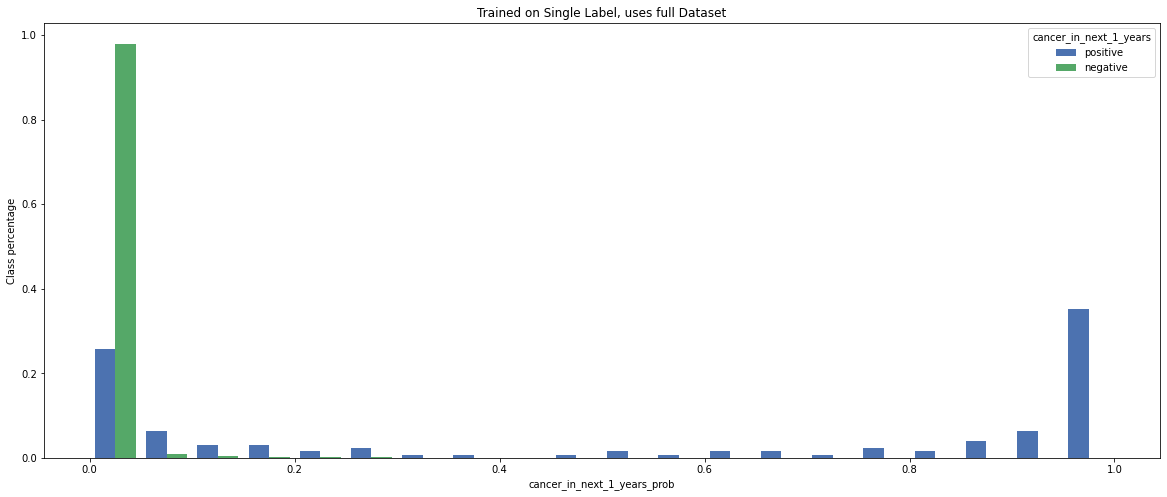

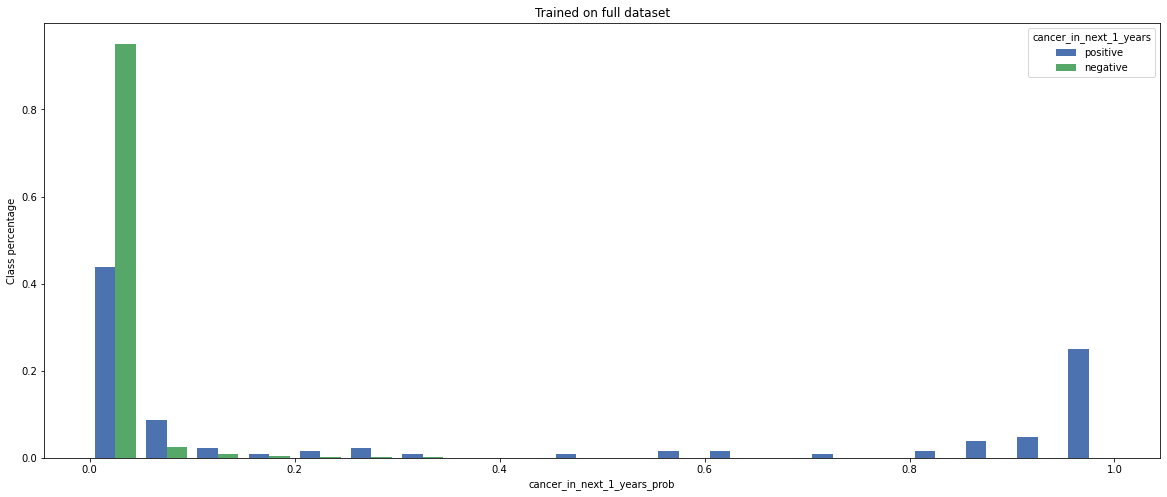

In [ ]:

full_dataset = single_cv_analytics_util.get_dataset_with_predictions()
plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', num_bins = 20, normalize = True, title='Trained on Single Label, uses full Dataset')
full_dataset = cv_analytics_util.get_dataset_with_predictions()
plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', num_bins = 20, normalize = True, title='Trained on full dataset')

# full_dataset = single_cv_analytics_util.get_dataset_with_predictions()
# plot_hist_side_by_side_for_class(full_dataset, 'ovar_cancer', 'cancer_in_next_1_years_prob', normalize = True, title='Trained on Single Label, uses full Dataset')
# full_dataset = cv_analytics_util.get_dataset_with_predictions()
# plot_hist_side_by_side_for_class(full_dataset, 'ovar_cancer', 'cancer_in_next_1_years_prob', normalize = True, title='Full dataset')